# Assignment 2: Statistical Testing and A/B Testing

You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. Your task is as follows:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

You should submit a Jupyter Notebook which holds the code for questions 1 and 2, and you can use Markdown cells for questions 3 and 4.

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

**Content** 

step 1: Analyze which variant boosts CTR lift & Time Spent lift.

step 2: statistical difference between the variants and control group.

step 3: Make a recommendation for variant to deploy. 

step 4: Create a roll-out plan.


-------------------------------------------------------------------

In [32]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\Assignment 2\experiment_dataset.csv",index_col='Unnamed: 0')
print(df.shape)
df.head()

(1000, 6)


,Age,Location,Device,Variant,Time Spent,CTR
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630
3,21,Location1,Device3,Variant B,20.061300,0.109783
4,57,Location1,Device2,Variant B,34.495503,0.068579


In [33]:
df.describe(include = 'all')

,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,3,3,3,NaN,NaN
top,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,343,346,340,NaN,NaN
mean,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,53.000000,NaN,NaN,NaN,26.255950,0.124238


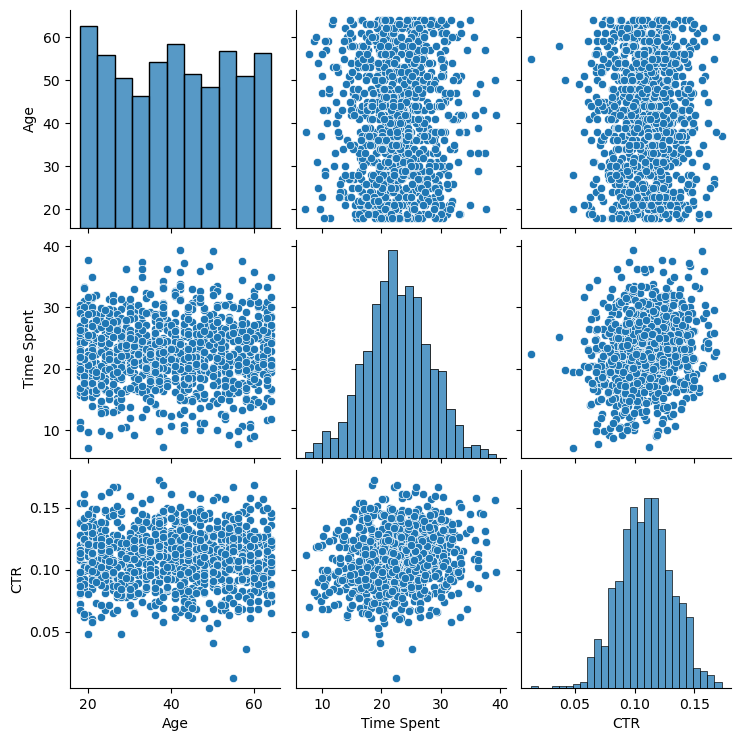

In [34]:
import seaborn as sns
sns.pairplot(df)

In [35]:
# group by location vs time spent 
dflt = df.groupby('Location')['Time Spent'].sum()
dflt.head()

Location
Location1    7561.526241
Location2    7768.606450
Location3    7383.211873
Name: Time Spent, dtype: float64

In [36]:
# from the above we can say that location 2 has more number of people Spending more time during the experiment

In [37]:
# # group by location vs CTR
dflc = df.groupby('Location')['CTR'].sum()
dflc.head()

Location
Location1    36.702404
Location2    37.221453
Location3    35.221390
Name: CTR, dtype: float64

In [38]:
# # group by device vs time spent & CTR
dfdt = df.groupby('Device')['Time Spent'].sum()
dfdt.head()

Device
Device1    7152.670068
Device2    7736.827005
Device3    7823.847492
Name: Time Spent, dtype: float64

In [39]:
# # group by device vs time spent & CTR
dfdc = df.groupby('Device')['CTR'].sum()
dfdc.head()

Device
Device1    34.644246
Device2    37.135409
Device3    37.365593
Name: CTR, dtype: float64

In [40]:
# group by varient vs time spent & CTR
dfvt = df.groupby('Variant')['Time Spent'].sum()


In [41]:
# group by varient vs time spent & CTR
dfvc = df.groupby('Variant')['CTR'].sum()
dfvc.head()

Variant
Control      33.508412
Variant A    39.688933
Variant B    35.947903
Name: CTR, dtype: float64

In [42]:
# one tail or two tail
# define hypothisis
# a - time spent ; b - CTR
# t-test or ANOVA to be applied from scipy 
# 

In [43]:
# compare the CTR and time spent 
# null hypothisis can be stated as that there is a relation between the varient groups
# we need statistic testing - for different varients & control
# calculate the p vale for wach test 



In [44]:
df.head()

,Age,Location,Device,Variant,Time Spent,CTR
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630
3,21,Location1,Device3,Variant B,20.061300,0.109783
4,57,Location1,Device2,Variant B,34.495503,0.068579


C:\Users\srika\AppData\Local\Temp\ipykernel_13336\3663500792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

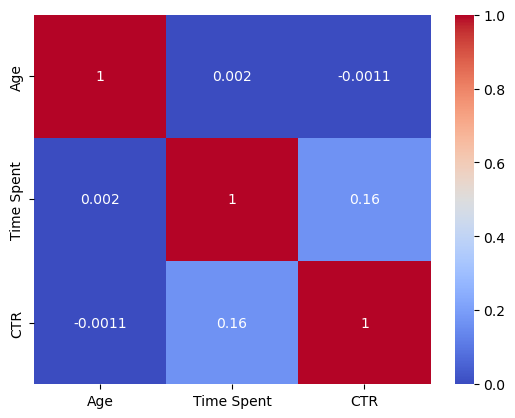

In [45]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


***1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.***

In [46]:
import scipy.stats as stats
import pandas as pd

# Separate the data into separate groups
control_data = df[df['Variant'] == 'Control']['Time Spent']
variant_a_data = df[df['Variant'] == 'Variant A']['Time Spent']
variant_b_data = df[df['Variant'] == 'Variant B']['Time Spent']

# Perform a t-test between control and variant A
t_statistic_a, p_value_a = stats.ttest_ind(control_data, variant_a_data)

# Perform a t-test between control and variant B
t_statistic_b, p_value_b = stats.ttest_ind(control_data, variant_b_data)

# Compare the p-values to determine the best variant
if p_value_a < p_value_b:
    best_variant = 'Variant A'
    t_statistic = t_statistic_a
    p_value = p_value_a
else:
    best_variant = 'Variant B'
    t_statistic = t_statistic_b
    p_value = p_value_b

# Print the results
print("Variant A vs Control:")
print("  t-statistic:", t_statistic_a)
print("  p-value:", p_value_a)
print()
print("Variant B vs Control:")
print("  t-statistic:", t_statistic_b)
print("  p-value:", p_value_b)
print()
print("Best Variant:", best_variant)
print("  t-statistic:", t_statistic)
print("  p-value:", p_value)


Variant A vs Control:
  t-statistic: -12.142363487472364
  p-value: 8.488565644996449e-31

Variant B vs Control:
  t-statistic: -8.174237395991806
  p-value: 1.496358076285182e-15

Best Variant: Variant A
  t-statistic: -12.142363487472364
  p-value: 8.488565644996449e-31


In [47]:

# Separate the data into separate groups
control_data = df[df['Variant'] == 'Control']['CTR']
variant_a_data = df[df['Variant'] == 'Variant A']['CTR']
variant_b_data = df[df['Variant'] == 'Variant B']['CTR']

# Perform a t-test between control and variant A
t_statistic_a, p_value_a = stats.ttest_ind(control_data, variant_a_data)

# Perform a t-test between control and variant B
t_statistic_b, p_value_b = stats.ttest_ind(control_data, variant_b_data)

# Compare the p-values to determine the best variant
if p_value_a < p_value_b:
    best_variant = 'Variant A'
    t_statistic = t_statistic_a
    p_value = p_value_a
else:
    best_variant = 'Variant B'
    t_statistic = t_statistic_b
    p_value = p_value_b

# Print the results
print("Variant A vs Control:")
print("  t-statistic:", t_statistic_a)
print("  p-value:", p_value_a)
print()
print("Variant B vs Control:")
print("  t-statistic:", t_statistic_b)
print("  p-value:", p_value_b)
print()
print("Best Variant:", best_variant)
print("  t-statistic:", t_statistic)
print("  p-value:", p_value)

Variant A vs Control:
  t-statistic: -13.829424737499187
  p-value: 1.9602781373243157e-38

Variant B vs Control:
  t-statistic: -6.4718143491783255
  p-value: 1.8743198199982106e-10

Best Variant: Variant A
  t-statistic: -13.829424737499187
  p-value: 1.9602781373243157e-38


<Axes: xlabel='Time Spent'>

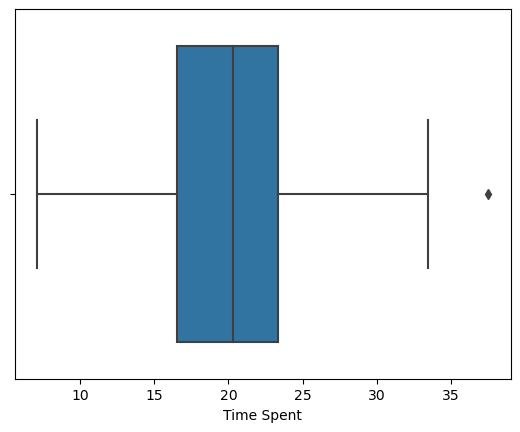

In [51]:
dfcon=df[df['Variant']=='Control']
sns.boxplot(x=dfcon['Time Spent'])

In [52]:
for i in range (2,8):
    print(i)

2
3
4
5
6
7


In [53]:
df.head()

,Age,Location,Device,Variant,Time Spent,CTR
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630
3,21,Location1,Device3,Variant B,20.061300,0.109783
4,57,Location1,Device2,Variant B,34.495503,0.068579


device :  Device1


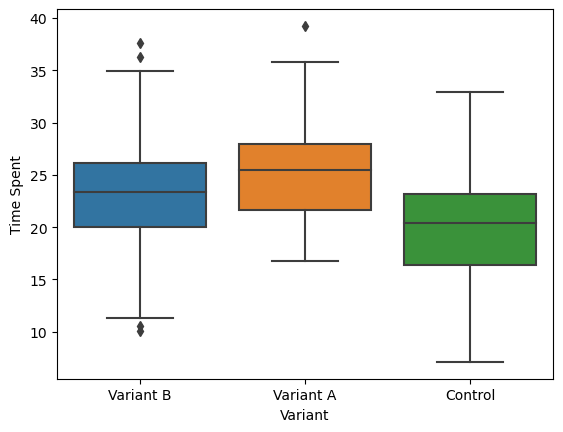

device :  Device2


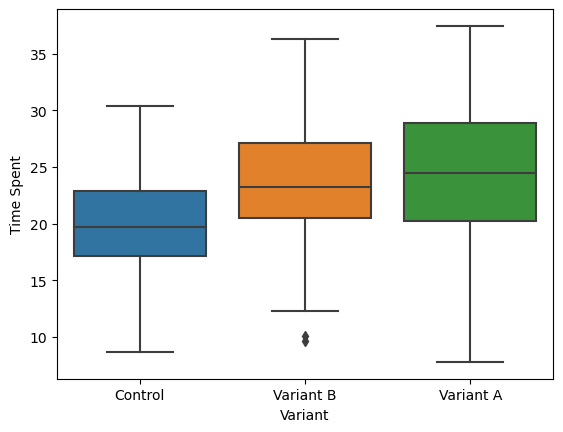

device :  Device3


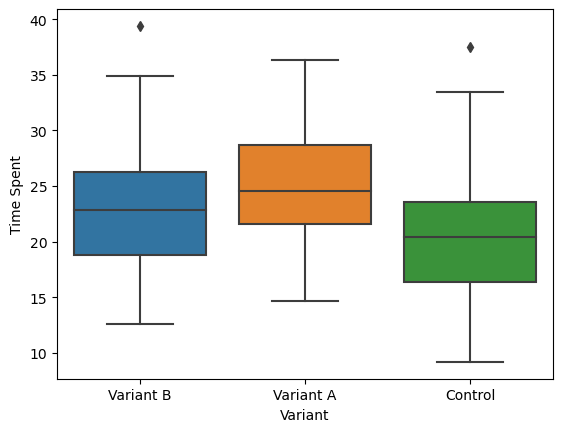

In [54]:
import matplotlib.pyplot as plt
for d in ['Device1','Device2','Device3']:
    dfrw=df[df['Device']==d]
    print('device : ',d)
    sns.boxplot(data=dfrw,y= 'Time Spent',x='Variant')
    plt.show()
    

***2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.***

In [55]:
# data set for each type of variant with respect to time spent
df_cont_t = df[df['Variant'] == 'Control']['Time Spent']
df_var_a_time = df[df['Variant'] == 'Variant A']['Time Spent']
df_var_b_time = df[df['Variant'] == 'Variant B']['Time Spent']

t_statistic_a, p_value_a = stats.ttest_ind(df_cont_t, df_var_a_time)
t_statistic_b, p_value_b = stats.ttest_ind(df_cont_t, df_var_b_time)

print(" Time Spent - Variant A compared to Control:")
print("  t-statistic:", t_statistic_a)
print("  p-value:", p_value_a,"\n")

print("Time Spent - Variant B compared to Control:")
print("  t-statistic:", t_statistic_b)
print("  p-value:", p_value_b,"\n")


# data set for each type of variant with respect to CTR
df_cont_ctr = df[df['Variant'] == 'Control']['CTR']
df_var_a_ctr = df[df['Variant'] == 'Variant A']['CTR']
df_var_b_ctr = df[df['Variant'] == 'Variant B']['CTR']

t_statistic_ac, p_value_ac = stats.ttest_ind(df_cont_ctr, df_var_a_ctr)
t_statistic_bc, p_value_bc = stats.ttest_ind(df_cont_ctr, df_var_b_ctr)

print("CTR - Variant A compared to Control:")
print("  t-statistic:", t_statistic_ac)
print("  p-value:", p_value_ac,"\n")

print("CTR - Variant B compared to Control:")
print("  t-statistic:", t_statistic_bc)
print("  p-value:", p_value_bc,"\n")

 Time Spent - Variant A compared to Control:
  t-statistic: -12.142363487472364
  p-value: 8.488565644996449e-31 

Time Spent - Variant B compared to Control:
  t-statistic: -8.174237395991806
  p-value: 1.496358076285182e-15 

CTR - Variant A compared to Control:
  t-statistic: -13.829424737499187
  p-value: 1.9602781373243157e-38 

CTR - Variant B compared to Control:
  t-statistic: -6.4718143491783255
  p-value: 1.8743198199982106e-10 



<Axes: >

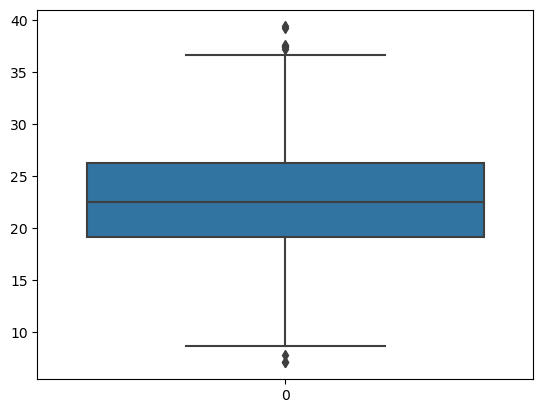

In [56]:
sns.boxplot(df['Time Spent'])

<Axes: >

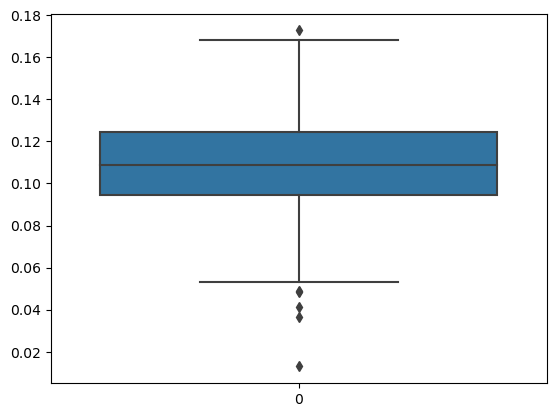

In [57]:
sns.boxplot(df['CTR'])

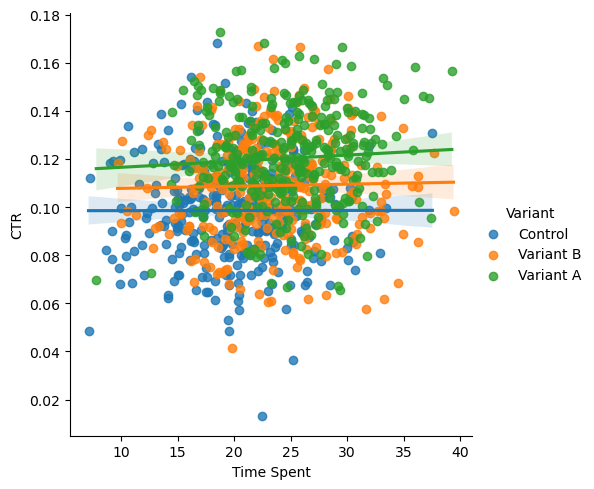

In [59]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

as per the graph, Variant B it seems to closer to Control. but statistically Variant A points are much widely spread.

**** null hypothesis: There is no significant difference between the variants ****

In [60]:
#considering 'time spent' and 'CTR' values for both variants
observed = np.array([
    [sum(df_cont_t), sum(df_cont_ctr)],
    [sum(df_var_a_time), sum(df_var_a_ctr)],
    [sum(df_var_b_time), sum(df_var_b_ctr)]
])

chi2, p_val, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

alpha = 0.05  # Significance level

if p_val < alpha:
    print("Reject the null hypothesis")
else:
    print("accept the null hypothesis")

Chi-squared: 0.04950627741232187
P-value: 0.9755507080154917
accept the null hypothesis


p-value < 0.05 is in-significant 
reject the null hypothesis.
that means no significance between variants w.r.t Time Spent

In summary, there is a significant difference in the 'time spent' & 'CTR' between the control group and the variants A and B.
Need to check if any of data point can be removed / adjusted based on method of data collection.

***3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy.***

both variants show significant improvements in time spent and CTR compared to the control. Non-analytical methods can be used as the deciding factor like - issues in launching, development period & cost, refresh rate and compatibility with future product references.

***4. Create a roll-out plan. How quickly will you introduce the feature to your audience?***


Since the decision is difficult to make, we could plan for a further analysis or choose the best variant based on non-analytical methods.

if further analysis is needed:
1) add detail of user feedback (collecting intentional user feedback)
2) variants compared to revenue generation
3) Risk of variant having issues


if chosen the best variant:
1) Need to make a timeline of deployment.
2) Run test for bugs.
3) Verify if there are further changes needed from all the other team to create a collective deployment.